Let's go ahead and switch gears and take a look at a data set consisting of information on donations to the federal campaign.

This is going to be the biggest data set we've looked at so far. You can download it here , then make sure to save it to the same folder your iPython Notebooks are in.

The questions we will be trying to answer while looking at this Data Set is:

1.) How much was donated and what was the average donation?
2.) How did the donations differ between candidates?
3.) How did the donations differ between Democrats and Republicans?
4.) What were the demographics of the donors?
5.) Is there a pattern to donation amounts?

In [26]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [12]:
donordf=pd.read_csv('Desktop//Election_Donor_Data.csv',low_memory=False)
donordf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [13]:
donordf.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [14]:
#count no of times each unique value occurs in a specific column
donordf['contb_receipt_amt'].value_counts()

#find mean donation and std deviation of donation
donmean=donordf['contb_receipt_amt'].mean()
donstd=donordf['contb_receipt_amt'].std()

#print
print('The average donation was %.2f with a standard deviation %.2f' %(donmean,donstd))

The average donation was 298.24 with a standard deviation 3749.67


In [15]:
topdonor=donordf['contb_receipt_amt'].copy()
Series.sort_values(topdonor,axis=0,inplace=True) #sorting to see the refund values/values in negative
topdonor
#getting rid of refund/negative values as they do not count in donations
topdonor=topdonor[topdonor>0]
Series.sort_values(topdonor,axis=0,inplace=True) #sort again
topdonor


334504          0.01
321779          0.01
323547          0.01
325614          0.01
326100          0.01
             ...    
319478     526246.17
344419    1511192.17
344539    1679114.65
326651    1944042.43
325136    2014490.51
Name: contb_receipt_amt, Length: 991475, dtype: float64

<AxesSubplot:>

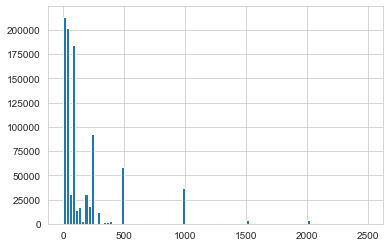

In [16]:
#getting top ten most common donations range
topdonor.value_counts().head()
#verifying if most donations are made in round number amount rather than in decimal amounts
#make series of amounts less than 2500 as 2500 is max amount
common=topdonor[topdonor<2500]
#make histogram
common.hist(bins=100)


In [17]:
#separating donations by party
#creating new party column by candidates and affiliation
candidates=donordf.cand_nm.unique()
candidates


array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

Let's go ahead and seperate Obama from the Republican Candidates by adding a Party Affiliation column. We can do this by using map along a dictionary of party affiliations.

In [18]:
# Dictionary of party affiliation
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

# Now map the party with candidate
donordf['Party'] = donordf.cand_nm.map(party_map)

A quick note, we could have done this same operation manually using a for loop, however this operation would be much slower than using the map method.

for i in xrange(0,len(donor_df)):
    if donor_df['cand_nm'][i] == 'Obama,Barack':
        donor_df['Party'][i] = 'Democrat'
    else:
        donor_df['Party'][i] = 'Republican'

 The candidate Bachmann, Michelle raised 2711439 dollars 


 The candidate Cain, Herman raised 7101082 dollars 


 The candidate Gingrich, Newt raised 12832770 dollars 


 The candidate Huntsman, Jon raised 3330373 dollars 


 The candidate Johnson, Gary Earl raised 566962 dollars 


 The candidate McCotter, Thaddeus G raised 39030 dollars 


 The candidate Obama, Barack raised 135877427 dollars 


 The candidate Paul, Ron raised 21009620 dollars 


 The candidate Pawlenty, Timothy raised 6004819 dollars 


 The candidate Perry, Rick raised 20305754 dollars 


 The candidate Roemer, Charles E. 'Buddy' III raised 373010 dollars 


 The candidate Romney, Mitt raised 88335908 dollars 


 The candidate Santorum, Rick raised 11043159 dollars 




<AxesSubplot:xlabel='cand_nm'>

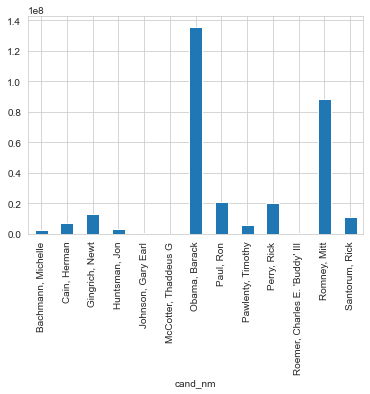

In [19]:
#getting ri of refund amount(amount in negative) from original donor dataset
donordf=donordf[donordf.contb_receipt_amt>0]
donordf.head()

#aggregating data by candidate
#showing how many donors for particular candidate
donordf.groupby('cand_nm')['contb_receipt_amt'].count()

#showing how much total was donated for particular candidates
donordf.groupby('cand_nm')['contb_receipt_amt'].sum()#this is unreadable format

#making tha above info verbally readable
# Start by setting the groupby as an object
cand_amount = donordf.groupby('cand_nm')['contb_receipt_amt'].sum()

# Our index tracker
i = 0

for don in cand_amount:
    print(" The candidate %s raised %.0f dollars " %(cand_amount.index[i],don))
    print('\n')
    i += 1
    
#making tha above info graphically readable
cand_amount.plot(kind='bar')


<AxesSubplot:xlabel='Party'>

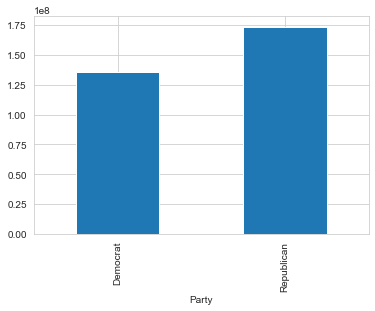

In [20]:
#comparing donation amount of obama with the sum of amounts for all republicans
donordf.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')

Finally to start closing out the project, let's look at donations and who they came from (as far as occupation is concerned). We will start by grabing the occupation information from the dono_df DataFrame and then using pivot_table to make the index defined by the various occupations and then have the columns defined by the Party (Republican or Democrat). FInally we'll also pass an aggregation function in the pivot table, in this case a simple sum function will add up all the comntributions by anyone with the same profession.

In [21]:
#look at donation and who they came from on basis of occupation and party affiliation
# Use a pivot table to extract and organize the data by the donor occupation
occupationdf = donordf.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='Party', aggfunc='sum')
occupationdf.head()



Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [22]:
# Check size
occupationdf.shape

(45067, 2)

<AxesSubplot:ylabel='contbr_occupation'>

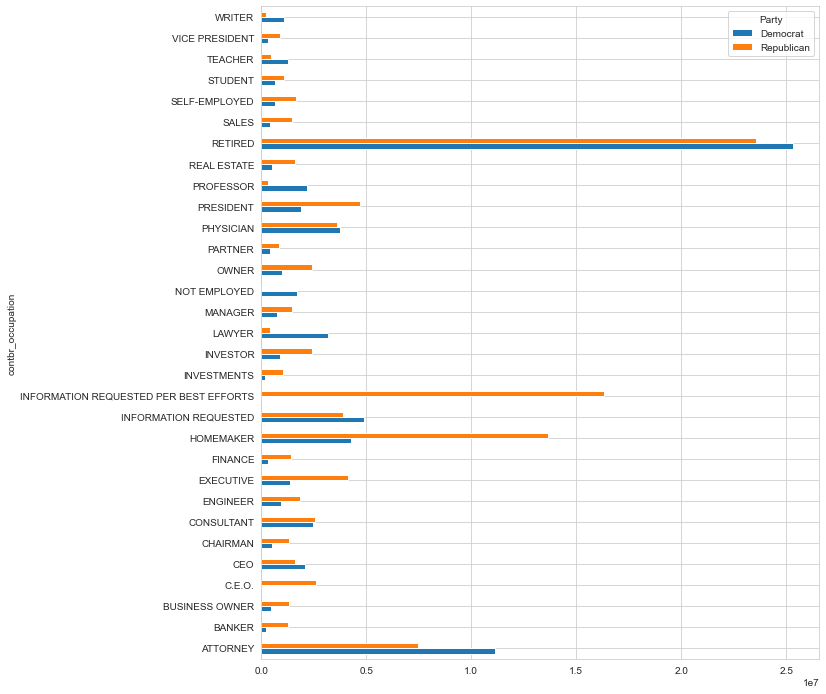

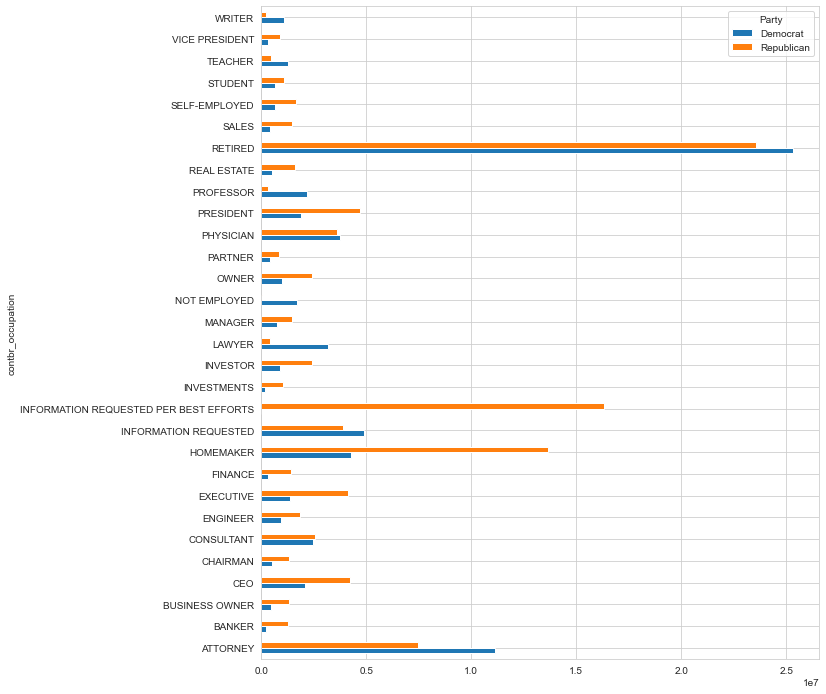

In [23]:
#see which occupations as a group contributed more than a million to either republicans or democrats or both
occupationdf = occupationdf[occupationdf.sum(1) > 1000000]
occupationdf

# plot out with pandas
# Horizontal plot for better readability
occupationdf.plot(kind='barh',figsize=(10,12))

#Looks like there are some occupations that are either mislabeled or aren't really occupations. Let's get rid of: Information Requested occupations and let's combine CEO and C.E.O.
# Drop the unavailble occupations
#occupationdf.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'],axis=0,inplace=True)


# Set new ceo row as sum of the current two
occupationdf.loc['CEO'] = occupationdf.loc['CEO'] + occupationdf.loc['C.E.O.']
# Drop CEO
occupationdf.drop('C.E.O.',inplace=True)


# Repeat previous plot!
occupationdf.plot(kind='barh',figsize=(10,12))